In [47]:
#-----01 within user----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold
import time


In [12]:
# --------starts here-------

#label
y=[]
# for k in range(10):#num of participants
for i in range(14):
    for j in range(30):
        y.append(i)

print(len(y))

tsfresh_feature = pd.read_csv("E:/XingDong/Texadar/data/final_filtered.csv")
tsfresh_feature = tsfresh_feature.drop(["id"],axis=1)
print(tsfresh_feature.shape)

420
(4200, 436)


In [29]:
#------ adding features from Shutong ------#
# fftfeatures1 = np.loadtxt(fname = "data/22gesture.txt",delimiter=',')
# fftfeatures = np.loadtxt(fname = "data/qstSpectro.txt",delimiter=',')
# fftfeatures = np.concatenate((fftfeatures1,fftfeatures2),axis=0)
fftfeatures = np.loadtxt(fname = "E:/XingDong/Texadar/data/finalfftFeature.txt",delimiter=',')
print(fftfeatures.shape)
_len = len(fftfeatures[:][0])
fft_df = pd.DataFrame(data=fftfeatures[:],    # values
              index=[i for i in range(4200)],    # 1st column as index
              columns=["f"+str(i) for i in range(_len)])
features_combine = fft_df.join(tsfresh_feature)
features_combine.shape

(4200, 100)


(4200, 536)

In [57]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
feature_list = []
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*420:(people+1)*420]
    for i in range(10,20):
        for j in range(10,20):
            x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.5, test_size=0.5)
            
            clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
            clf.fit(x_train, y_train)
            temp = clf.score(x_train, y_train)
            train_results[people].append(temp)
            if (temp > maxyhat_train[people]).any():
                maxyhat_train[people] = temp
            temp = clf.score(x_test, y_test)
            test_results[people].append(temp)
            feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
            if (maxyhat_test[people] < temp).any():
                maxyhat_test[people] = temp
                for feature in feature_importances.index.tolist()[:50]:
                    if not feature in feature_list:
                        feature_list.append(feature)
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)

36.42754101753235
26.361522912979126
25.536574363708496
26.414450645446777
23.572744607925415
24.268436908721924
24.56063461303711
23.6470627784729
23.48668670654297
23.96332573890686
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9904761904761905, 0.9095238095238095, 0.9952380952380953, 0.9571428571428572, 0.919047619047619, 0.9523809523809523, 0.9, 0.9285714285714286, 0.9238095238095239, 0.9809523809523809]


In [58]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
np.mean(mylist)


[0.9904761904761905, 0.9095238095238095, 0.9952380952380953, 0.9571428571428572, 0.919047619047619, 0.9523809523809523, 0.9, 0.9285714285714286, 0.9238095238095239, 0.9809523809523809]


0.9457142857142857

In [1]:
feature_list

NameError: name 'feature_list' is not defined

In [60]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*420:(people+1)*420]
    for i in range(10,20):
        for j in range(10,20):
            x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.5, test_size=0.5)
            
            clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
            clf.fit(x_train, y_train)
            temp = clf.score(x_train, y_train)
            train_results[people].append(temp)
            if (temp > maxyhat_train[people]).any():
                maxyhat_train[people] = temp
            temp = clf.score(x_test, y_test)
            test_results[people].append(temp)
            feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
            if (maxyhat_test[people] < temp).any():
                maxyhat_test[people] = temp
              
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)

16.541401624679565
17.55302667617798
16.469504356384277
18.107513666152954
17.236593008041382
17.465797424316406
18.27852773666382
17.041351079940796
16.88951563835144
17.283035278320312
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9761904761904762, 0.9142857142857143, 0.9952380952380953, 0.9619047619047619, 0.9285714285714286, 0.9714285714285714, 0.9, 0.9380952380952381, 0.9285714285714286, 0.9857142857142858]


In [61]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
np.mean(mylist)


[0.9761904761904762, 0.9142857142857143, 0.9952380952380953, 0.9619047619047619, 0.9285714285714286, 0.9714285714285714, 0.9, 0.9380952380952381, 0.9285714285714286, 0.9857142857142858]


0.95

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.arange(100), train_results,'b', label='Train AUC')
line2, = plt.plot(np.arange(100), test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [64]:
np.argmax([0,1,2,3,4,5,6])

6

In [72]:
for i in range(10):
    print(np.argmax(test_results[i]))

12
35
71
30
50
43
18
6
49
78


Normalized confusion matrix


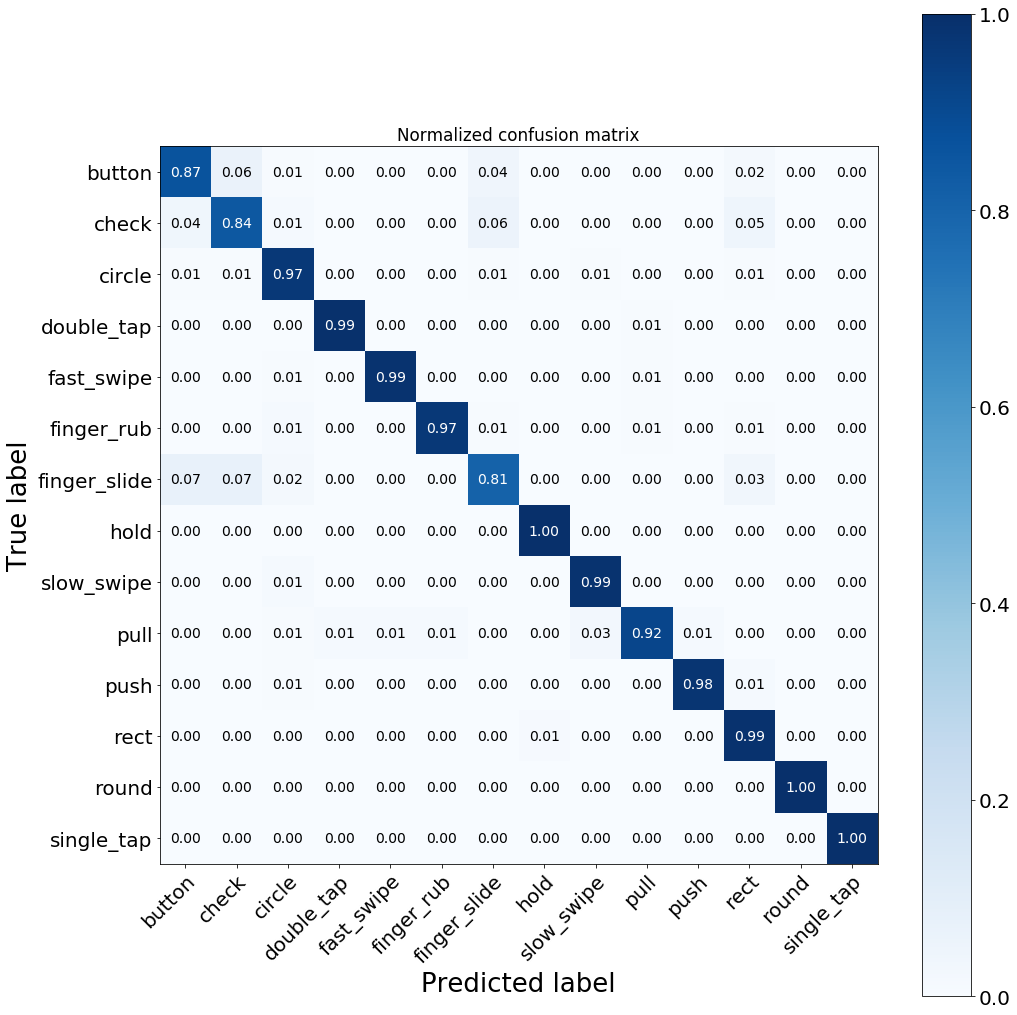

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0


In [95]:
#------ using ranked features ----------#
bestmodel = 0
maxyhat_test=0

fig = None
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    global fig
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    plt.rcParams.update({'font.size': 14})
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=26)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

v2_names=['button','check','circle','double_tap','fast_swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','round',
         'single_tap']

v2_names = np.array(v2_names)
y_pred = []
y_test_ = []
x_max=[11,13,17,13,15,14,11,10,14,17]
y_max=[12,15,11,10,10,13,18,16,19,18]
for people in range(10):
    #get each user
    X = features_combine[people*420:(people+1)*420]
    i=x_max[people]
    j=y_max[people]
    x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.5, test_size=0.5)

    clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
    clf.fit(x_train, y_train)
    y_pred = y_pred+list(clf.predict(x_test))
#     print(list(clf.predict(x_test)))
#     print(y_test)
    y_test_ += y_test
plot_confusion_matrix(y_test_, y_pred, classes=v2_names, normalize=True,
          title='4200 within 2fold')
plt.show()

seconds = time.time()-seconds
#     print(seconds)
seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)
fig.savefig("4200_within_2fold.png", bbox_inches = "tight")

NameError: name 'fig' is not defined